In [1]:
#Importamos las librerías que utilizaremos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay




In [2]:

# Importamos la data
data = pd.read_csv('/content/BASE.csv', encoding='ISO-8859-1', sep=';')

# Mostramos las primeras filas para verificar la estructura.
data.head()



,lugar_presenta,proceso,genero,colegio,prof_padre,prof_madre,calificacion_carpeta,meritos,inteligencia,promedio_acad,aptitud_med,ppff,visita_dom,calificacion,apto
0,UIO,OFICIAL DE ARMA,MASCULINO,COLEGIO MILITAR TENIENTE HUGO ORTIZ,MECANICO,INGENIERA,86.1,1.01,119.0,16.45,APTO CON CONDICION,APROBADO,APROBADO,12.88,1
1,GYE,OFICIAL DE ARMA,MASCULINO,LICEO NAVAL DE GUAYAQUIL,MILITAR,ODONTÓLOGA,78.0,0.20,130.0,16.25,APTO,APROBADO,APROBADO,11.91,1
2,GYE,OFICIAL DE ARMA,MASCULINO,LICEO NAVAL DE GUAYAQUIL,MILITAR,Master en psicología educativa,78.0,0.20,131.0,16.05,APTO CON CONDICION,APROBADO,APROBADO,11.88,1
3,GYE,OFICIAL DE ARMA,FEMENINO,LICEO NAVAL DE GUAYAQUIL,ECONOMISTA,ECONOMISTA,80.0,0.20,130.0,16.20,APTO CON CONDICION,APROBADO,APROBADO,11.67,1
4,GYE,OFICIAL DE ARMA,MASCULINO,UNIDAD EDUCATIVA EUGENIO ESPEJO,MILITAR,BACHILLER,58.0,0.00,109.0,15.25,APTO,APROBADO,APROBADO,11.63,1


In [3]:
# Convertimos variables categóricas a numéricas
label_encoder = LabelEncoder()

data['genero'] = label_encoder.fit_transform(data['genero'])
data['proceso'] = label_encoder.fit_transform(data['proceso'])
data['colegio'] = label_encoder.fit_transform(data['colegio'])
data['prof_padre'] = label_encoder.fit_transform(data['prof_padre'])
data['prof_madre'] = label_encoder.fit_transform(data['prof_madre'])
data['aptitud_med'] = label_encoder.fit_transform(data['aptitud_med'])
data['ppff'] = label_encoder.fit_transform(data['ppff'])
data['visita_dom'] = label_encoder.fit_transform(data['visita_dom'])



In [4]:
# Definimos características (X) y objetivo (y)
X = data.drop(columns=['apto', 'lugar_presenta'])  # Excluimos columnas objetivo y columna irrelevante
y = data['apto']

# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputamos los valores faltantes con la media de cada columna.
imputer = SimpleImputer(strategy='mean') # Creamos una instancia de SimpleImputer

X_train_imputed = imputer.fit_transform(X_train) # Ajustamos y transformamos los datos de entrenamiento
X_test_imputed = imputer.transform(X_test) # Transformamos los datos de prueba



In [5]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed) # Usamos los datos imputados
X_test_scaled = scaler.transform(X_test_imputed) # Usamos los datos imputados

# Creamos y entrenamos una red neuronal simple (MLPClassifier)
mlp = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Hacemos predicciones en el conjunto de prueba.
y_pred = mlp.predict(X_test_scaled)



In [6]:
# Evaluamos la precisión del modelo.
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8961038961038961

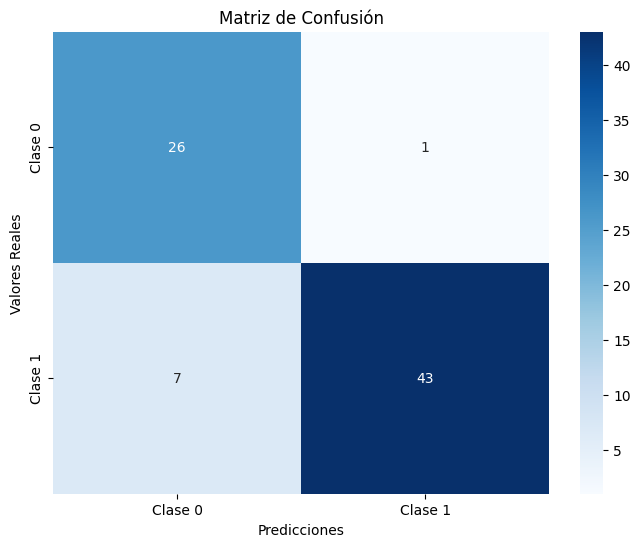

In [12]:
#Creamos una matriz de confusión

# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Creamos un gráfico para mejor visualización
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Clase 0", "Clase 1"],
            yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()